In [204]:
import requests
from datetime import datetime
import re

from flat_crawler.models import FlatPost, Source
from bs4 import BeautifulSoup

In [205]:
FlatPost(source=Source.ADA, url="", price=0, dt_posted=datetime.now(), post_hash='aa').save()

TypeError: FlatPost() got an unexpected keyword argument 'post_hash'

In [179]:
import logging

In [182]:
logging.error("b")

ERROR:root:b


In [20]:
BASE_URL = 'https://gumtree.pl'

In [5]:
URL = "https://www.gumtree.pl/s-mieszkania-i-domy-sprzedam-i-kupie/srodmiescie/v1c9073l3200017p1?pr=450000,1000000"

In [6]:
page = requests.get(URL)

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')

In [8]:
posts = soup.findAll("div", {"class": "tileV1"})

In [207]:
post = posts[0]

In [184]:
import hashlib

In [208]:
post.encode()

b'<div class="tileV1"><div class="title"><a class="href-link tile-title-text" href="/a-mieszkania-i-domy-sprzedam-i-kupie/srodmiescie/mieszkanie-57m-w-srodmiesciu-z-miejscem-postojowym/1008356409880912476393509">Mieszkanie 57m w \xc5\x9ar\xc3\xb3dmie\xc5\x9bciu z miejscem postojowym</a></div><div class="description"><span>BEZ PROWIZJI OD KUPUJ\xc4\x84CEGO!\xc5\xbbycie w centrum kusi wielu. Wsz\xc4\x99dzie blisko, kultura i o\xc5\x9bwiata nie</span><span class="hidden">mal pod oknami, podobnie jak transport, nie m\xc3\xb3wi\xc4\x85c ju\xc5\xbc o sklepach, lokalach us\xc5\x82ugowych czy gastronomicznych. Zaczynasz dzie\xc5\x84 od wypalanej na miejscu kawy w Coffee Karma na Placu Zbawiciela, po po\xc5\x82udniu wpadasz na lunch na Placu Konstytucji, do Orzo albo do Manekina, a  wieczorem  ...</span><span class="hellip">...</span></div><div class="tile-img-section"><div class="pictureLoading"><!--M^s0-0-2-0-23-105-3-9-17[0]-1008356409880912476393509 s0-0-2-0-23-105-3-9-17[0] #s0-0-2-0-23-10

In [196]:
len(hashlib.md5(post.encode()).hexdigest())

32

In [183]:
post

<div class="tileV1"><div class="title"><a class="href-link tile-title-text" href="/a-mieszkania-i-domy-sprzedam-i-kupie/srodmiescie/mieszkanie-57m-w-srodmiesciu-z-miejscem-postojowym/1008356409880912476393509">Mieszkanie 57m w Śródmieściu z miejscem postojowym</a></div><div class="description"><span>BEZ PROWIZJI OD KUPUJĄCEGO!Życie w centrum kusi wielu. Wszędzie blisko, kultura i oświata nie</span><span class="hidden">mal pod oknami, podobnie jak transport, nie mówiąc już o sklepach, lokalach usługowych czy gastronomicznych. Zaczynasz dzień od wypalanej na miejscu kawy w Coffee Karma na Placu Zbawiciela, po południu wpadasz na lunch na Placu Konstytucji, do Orzo albo do Manekina, a  wieczorem  ...</span><span class="hellip">...</span></div><div class="tile-img-section"><div class="pictureLoading"><!--M^s0-0-2-0-23-105-3-9-17[0]-1008356409880912476393509 s0-0-2-0-23-105-3-9-17[0] #s0-0-2-0-23-105-3-9-17[0]-1008356409880912476393509--><div class="bolt-image"><picture><source data-srcset=

In [54]:
title = post.find('div', class_='title').text

In [48]:
url = BASE_URL + post.find('div', class_='title').find('a', class_='href-link tile-title-text').attrs.get('href')

In [27]:
short_desc = post.find('div', class_='description').text

In [33]:
price_text = post.find('span', class_='ad-price').text
price = int(re.sub(r'\s+', '', price.replace('zł', '')))

In [45]:
img_url = post.find('div', class_='bolt-image').find('picture').find('source', {'type': 'image/jpeg'}).attrs.get('data-srcset')

In [47]:
# MAIN POST

In [49]:
details_soup = BeautifulSoup(requests.get(url).content, 'html.parser')

In [51]:
print(details_soup.prettify())

<!DOCTYPE html>
<html class="VIP" data-locale="pl_PL" lang="pl" xmlns="http://www.w3.org/1999/html">
 <head>
  <meta content="1eb4706f51217ca0564534b7861db242679c3598b4e1be9638fe22c4075bc9e1d6edbba28c57c981774eb5b71f21a78b69bdacd4d447712fb117001f50d31bbf4bac03c76c2785fc98a9fc5ec4b1130c800bce8f13bf2e33ec863bbe40483929" name="csrf-token"/>
  <title>
   Mieszkanie 57m w Śródmieściu z miejscem postojowym - Śródmieście - Gumtree Poland - 835640988 | Gumtree
  </title>
  <meta content="BEZ PROWIZJI OD KUPUJĄCEGO!Życie w centrum kusi wielu. Wszędzie blisko, kultura i oświata niemal pod oknami, podo...835640988" name="description"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta cont

In [75]:
details = details_soup.find('ul', class_='selMenu')

In [66]:
description = details_soup.find('div', class_='description').text

In [76]:
details_dict = {entry.find('span', class_='name'): entry.find('span', class_='value') for entry in details.findAll('li')}

In [80]:
details_dict = {}
for entry in details.findAll('li'):
    name = entry.find('span', class_='name')
    val = entry.find('span', class_='value')
    if name and val:
        details_dict[name.text] = val.text

In [81]:
details_dict

{'Data dodania': '09/11/2020',
 'Lokalizacja': 'Śródmieście, Warszawa',
 'Na sprzedaż przez': 'Agencja',
 'Rodzaj nieruchomości': 'Mieszkanie',
 'Liczba pokoi': '2 pokoje',
 'Liczba łazienek': '1 łazienka',
 'Parking': 'Ulica'}

In [57]:
print(details.prettify())

<ul class="selMenu">
 <li>
  <div class="attribute">
   <span class="name">
    Data dodania
   </span>
   <span class="value">
    09/11/2020
   </span>
  </div>
 </li>
 <li>
  <div class="attribute">
   <span class="name">
    Lokalizacja
   </span>
   <span class="value">
    <div class="location">
     <a href="/s-srodmiescie/v1l3200017p1">
      Śródmieście
     </a>
     ,
     <a href="/s-warszawa/v1l3200008p1">
      Warszawa
     </a>
    </div>
   </span>
  </div>
 </li>
 <li>
  <div class="attribute">
   <span class="name">
    Na sprzedaż przez
   </span>
   <span class="value">
    Agencja
   </span>
  </div>
 </li>
 <li>
  <div class="attribute">
   <span class="name">
    Rodzaj nieruchomości
   </span>
   <span class="value">
    Mieszkanie
   </span>
  </div>
 </li>
 <li>
  <div class="attribute">
   <span class="name">
    Liczba pokoi
   </span>
   <span class="value">
    2 pokoje
   </span>
  </div>
 </li>
 <li>
  <div class="attribute">
   <span class="name">
    

In [137]:
import PIL

In [ ]:
from PIL import Image
from io import BytesIO

In [98]:
img_url_a = 'https://i.ebayimg.com/00/s/NjgzWDEwMjQ=/z/3H8AAOSwFu1gDFCC/$_20.JPG'

In [99]:
img_url_b = 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6ImZ6NjVxeThpeWc0MjEtQVBMIiwidyI6W3siZm4iOiJqMWozbzEzbTZiZ24xLUFQTCIsInMiOiIxNCIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.qD3I6cCpP0jAL3Aq96dpMZM_CAsuYmgSBwm6U9Az4pE/image;s=1280x1024;q=80'

In [104]:
img_url_x = 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InY3eDRpb2txOTh5djEtQVBMIiwidyI6W3siZm4iOiJqMWozbzEzbTZiZ24xLUFQTCIsInMiOiIxNCIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.eVJ1XzpPLIOIq8rr_WyNvAmGWFp7tuXslKJPirxlhq8/image;s=1280x1024;q=80'

In [100]:
im_a = Image.open(BytesIO(requests.get(img_url_a).content))

In [102]:
im_b = Image.open(BytesIO(requests.get(img_url_b).content))

In [105]:
im_x = Image.open(BytesIO(requests.get(img_url_x).content))

In [107]:
import cv2

In [108]:
sift = cv2.

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [111]:
im_a.entropy()

9.08771608499769

In [112]:
im_b.entropy()

9.122632188761951

In [113]:
im_x.entropy()

8.88265200372706

In [115]:
len(im_a.histogram())

768

In [116]:
import numpy as np

In [120]:
c = im_a.getdata()

In [121]:
im_a.size

(800, 534)

In [122]:
im_b.size

(1024, 683)

In [128]:
np.average(np.array(im_a.getdata()), axis=0)

array([150.28408708, 124.25064139, 102.39665028])

In [129]:
np.average(np.array(im_b.getdata()), axis=0)

array([150.61985553, 123.21789354, 103.86319975])

In [130]:
np.average(np.array(im_x.getdata()), axis=0)

array([146.16355349, 131.23818974, 117.89826163])

In [131]:
im_a.size

(800, 534)

In [132]:
im_b.size

(1024, 683)

In [133]:
534 * 1024 / 800

683.52

In [153]:
im_b_b = im_b.resize(im_a.size, Image.ADAPTIVE)

In [158]:
im_x_b = im_x.resize(im_a.size, Image.ADAPTIVE)

In [159]:
adata = np.array(im_a.getdata())

In [160]:
bdata = np.array(im_b_b.getdata())

In [161]:
xdata = np.array(im_x_b.getdata())

In [168]:
np.average((adata - bdata) ** 2)

305.21038701622973

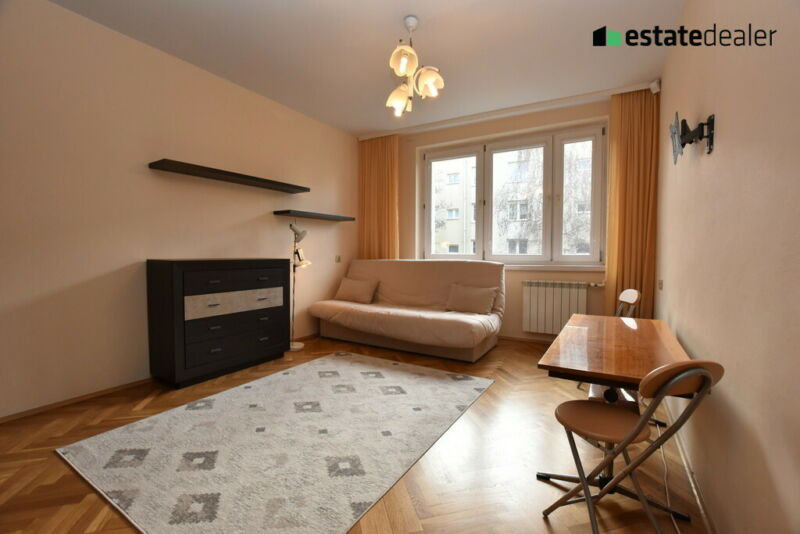

In [146]:
im_a

In [169]:
small = im_a.size.resize((30, 20))

(800, 534)

In [170]:
small_url = 'https://i.ebayimg.com/images/g/SKsAAOSw~DNf~dcW/s-l140.webp'
small_im = Image.open(BytesIO(requests.get(small_url).content))

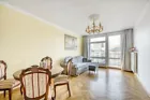

In [173]:
small_im.resize((150, 100))

In [174]:
byteIO = BytesIO()

In [175]:
small_im.save(byteIO, format='PNG')

In [177]:
len(byteIO.getvalue())

19032

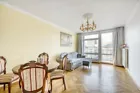

In [178]:
Image.open(byteIO)

In [210]:
byteIO.getvalue()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x8c\x00\x00\x00]\x08\x02\x00\x00\x00\xf8\xc0\x19\xe3\x00\x00J\x1fIDATx\x9c\xc5\xbdW\xb0l\xd7u \xb6\xd6\xda{\x9f\xd4\xf1\xe6\xfb2\x80\x87\x87H"\x10b\x94\x8aCrH\x8a\x92\xa5\x91<V\xf08\x94\xc7\x1f.\x8f\xcb.\xfb\xcfU\xae\xf2\x87\xbf]\xe5\x8f\xb1\xab\\\x9e\xf2\xb8l\xcf(\x8cF\xd2\x883\x1a\r)\x91\x14%1\x83\x04\x08\x80\x00\x01<<<\xbc\xfcn\xbe\x9dN\xdaa-\x7f\x9c\xee\xbe}_\x00A\x91\x92\x17.\xfau\x9f>}\xce\xde{\xed\x95\xc3\xc1\x7f\xf3\xef~\x1f\x00\x00\x18\x00b\x13\xcd\xdf\'&\x01\x00D\x04\x00Zxm\x00\x91\x16\xde\x1f\x1d\x9f\xc1\xd1\xb7$w\x1eg\x00\x11\x11a\x16\x01\xba\xf3\x9a$\xf7\xbe\xb2\x88,\xbc\xe7\xbb\xee\xb88\xaa\x85o\xf1\xae3\x85\xee\x1c\xf3\xc2\x18\x18\x9b\xb1\t\xcfn\xa1\x16\xe6r\xfc^w\xcf\xfa\xbe\xd0\x0c\xbe\x19\xf6\xf4=\xcblF\x04\x00,2;>\xbd/3\xd7u\r\x00q\x1c\xebN\xab}lV\xcd\xef\x04\xfeF\x01\x11\x01H!\xc8\xc2\x025\x9b\x00\xdf\x13\x92\xee\xbd@\x8b\xe7\xfcdc\x03\x85\xaa\xf9\xa8\xe0\xde\xf7\xfak \x89\x05\xe7\xef\x05y:\xdaf\xd3\xcc\x90\xc4\x0b\x